#### Student Depression Variable Imputation

**Name:** Adiel Nefthali Delgado Silva


#### Import Libraries

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Read Dataset

In [623]:
df = pd.read_csv("Student_Depression_Dataset.csv")

#### Exploratory Data Analysis

In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [625]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [626]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [627]:
# Borrar
df = df.drop(["id"], axis=1)

In [628]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [629]:
df.shape

(27901, 17)

In [630]:
#### Dropna borra todos la fila que tiene esos valores NA
df = df.dropna()
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [631]:
df["City"].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [632]:
df["City"].value_counts()[df["City"].value_counts() <= 400].sum()

np.int64(26)

#### Removing Cities with less than 400 students

In [633]:
common_cities = df["City"].value_counts()[df["City"].value_counts() <= 400].index
common_cities

Index(['Saanvi', 'Bhavna', 'City', 'Harsha', 'Less Delhi', 'M.Tech', '3.0',
       'Less than 5 Kalyan', 'Mira', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
       'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini',
       'Nandini', 'Khaziabad'],
      dtype='object', name='City')

#### Removing values in Age

<Axes: >

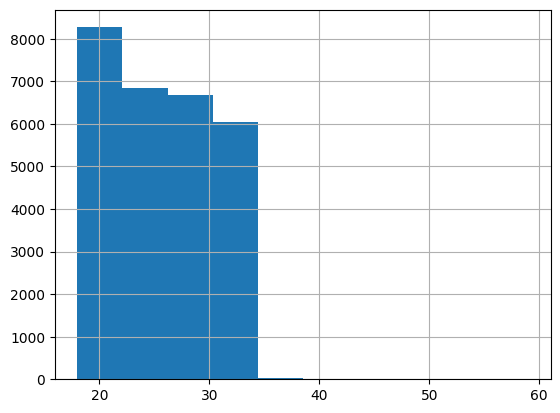

In [634]:
df["Age"].hist()

<Axes: >

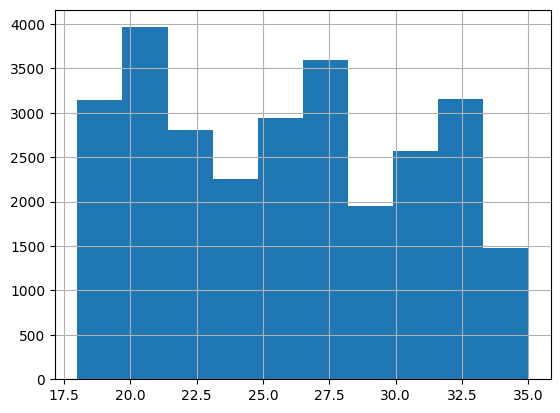

In [635]:
df["Age"] = df["Age"][df["Age"] <= 35]
df["Age"].hist()

In [636]:
df["Profession"].value_counts()

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [637]:
# Borrar
df = df.drop(["Profession"], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [638]:
df["Academic Pressure"].value_counts()

Academic Pressure
3.0    7461
5.0    6296
4.0    5155
1.0    4800
2.0    4177
0.0       9
Name: count, dtype: int64

In [639]:
df["Academic Pressure"] = df["Academic Pressure"][df["Academic Pressure"] >= 2]
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [640]:
df["Work Pressure"].value_counts()

Work Pressure
0.0    27895
5.0        2
2.0        1
Name: count, dtype: int64

In [641]:
df = df.drop(["Work Pressure"], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [642]:
df["CGPA"].value_counts()

CGPA
8.0400    821
9.9600    425
5.7400    410
8.9500    371
9.2100    343
         ... 
6.6400      1
7.0625      1
6.9800      1
6.4400      1
6.0900      1
Name: count, Length: 332, dtype: int64

<Axes: >

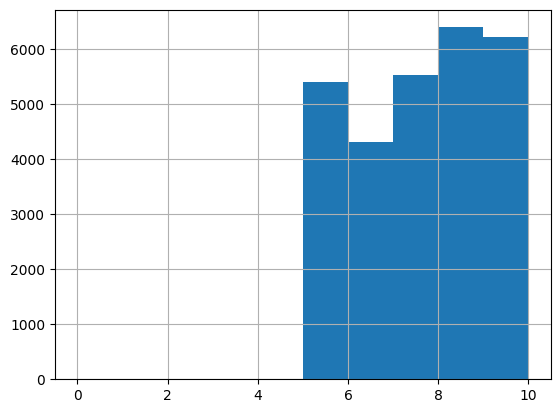

In [643]:
df["CGPA"].hist()

<Axes: >

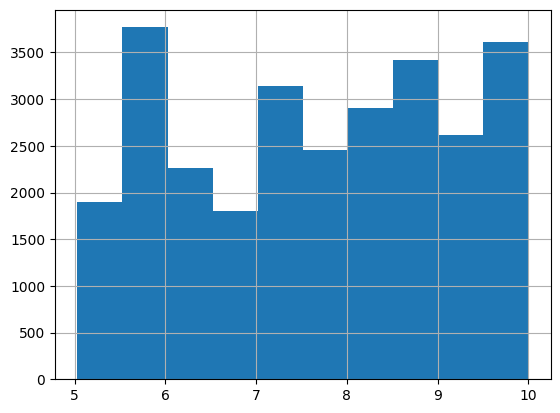

In [644]:
df["CGPA"] = df["CGPA"][df["CGPA"] > 5]
df["CGPA"].hist()

In [645]:
df["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5820
1.0    5449
5.0    4422
0.0      10
Name: count, dtype: int64

<Axes: >

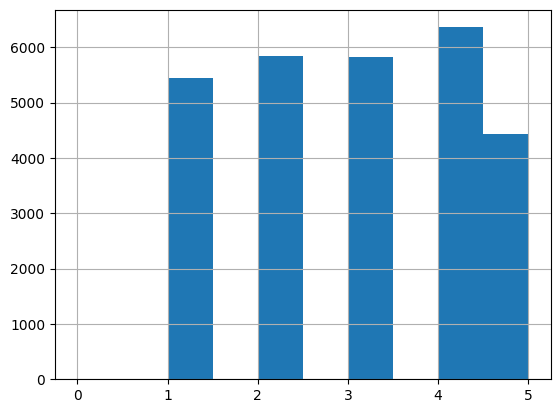

In [646]:
df["Study Satisfaction"].hist()

In [647]:
df["Study Satisfaction"] = df["Study Satisfaction"][df["Study Satisfaction"] >= 1]
df["Study Satisfaction"].value_counts()

Study Satisfaction
4.0    6359
2.0    5838
3.0    5820
1.0    5449
5.0    4422
Name: count, dtype: int64

In [648]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [649]:
df["Job Satisfaction"].value_counts()

Job Satisfaction
0.0    27890
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64

In [650]:
df = df.drop(["Job Satisfaction"], axis=1)

In [651]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [652]:
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [653]:
df = df.loc[df["Sleep Duration"] != "Others"]
df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Name: count, dtype: int64

In [654]:
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10308
Moderate      9914
Healthy       7646
Others          12
Name: count, dtype: int64

In [655]:
df = df.loc[df["Dietary Habits"] != "Others"]
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10308
Moderate      9914
Healthy       7646
Name: count, dtype: int64

In [656]:
df["Degree"].value_counts()

Degree
Class 12    6079
B.Ed        1864
B.Com       1504
B.Arch      1476
BCA         1431
MSc         1189
B.Tech      1151
MCA         1041
M.Tech      1020
BHM          925
BSc          886
M.Ed         819
B.Pharm      809
M.Com        734
BBA          696
MBBS         695
LLB          670
BE           611
BA           597
M.Pharm      581
MD           572
MBA          561
MA           544
PhD          520
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [657]:
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
Yes    17635
No     10233
Name: count, dtype: int64

In [658]:
df["Work/Study Hours"].value_counts()

Work/Study Hours
10.0    4231
12.0    3166
11.0    2891
8.0     2507
6.0     2245
9.0     2024
7.0     1999
0.0     1698
4.0     1608
2.0     1588
3.0     1468
5.0     1296
1.0     1147
Name: count, dtype: int64

In [659]:
df["Financial Stress"].value_counts()

Financial Stress
5.0    6709
4.0    5770
3.0    5220
1.0    5113
2.0    5056
Name: count, dtype: int64

In [660]:
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
No     14378
Yes    13490
Name: count, dtype: int64

In [661]:
df["Depression"].value_counts()

Depression
1    16318
0    11550
Name: count, dtype: int64

#### Data Transformation

In [662]:

df["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    8304
7-8 hours            7343
5-6 hours            6178
More than 8 hours    6043
Name: count, dtype: int64

In [663]:
df.loc[df["Sleep Duration"] == "Less than 5 hours", "Sleep Duration"] = 0
df.loc[df["Sleep Duration"] == "5-6 hours", "Sleep Duration"] = 1
df.loc[df["Sleep Duration"] == "7-8 hours", "Sleep Duration"] = 2
df.loc[df["Sleep Duration"] == "More than 8 hours", "Sleep Duration"] = 3
df["Sleep Duration"].value_counts()

Sleep Duration
0    8304
2    7343
1    6178
3    6043
Name: count, dtype: int64

In [664]:
df["Dietary Habits"].value_counts()
df = df.loc[df["Dietary Habits"] != "Others"]
df["Dietary Habits"].value_counts()

Dietary Habits
Unhealthy    10308
Moderate      9914
Healthy       7646
Name: count, dtype: int64

In [665]:
df.loc[df["Dietary Habits"] == "Healthy", "Dietary Habits"] = 0
df.loc[df["Dietary Habits"] == "Unhealthy", "Dietary Habits"] = 1
df.loc[df["Dietary Habits"] == "Moderate", "Dietary Habits"] = 2
df["Dietary Habits"].value_counts()

Dietary Habits
1    10308
2     9914
0     7646
Name: count, dtype: int64

In [666]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,2,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0,0,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,2,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,2,M.Tech,Yes,1.0,1.0,No,0


In [667]:
# Creating new degree column with
df.loc[df["Degree"].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|B|LLB', regex=True), "new_degree"] = "Graduated"
df.loc[df["Degree"].str.contains(r'MSc|M|LLM', regex=True), "new_degree"] = "Post Graduated"
df.loc[df["Degree"] == "Class 12", "new_degree"] = "High School"
df = df.loc[df["Degree"] != "Others"]
df["new_degree"].value_counts()

new_degree
Graduated         11695
Post Graduated     9539
High School        6079
Name: count, dtype: int64

In [668]:
df.loc[df["new_degree"] == "Graduated", "new_degree"] = 0
df.loc[df["new_degree"] == "Post Graduated", "new_degree"] = 1
df.loc[df["new_degree"] == "High School", "new_degree"] = 2
df.fillna("Others")
df["new_degree"].value_counts()

C:\Users\nefth\AppData\Local\Temp\ipykernel_2492\2172905134.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna("Others")


new_degree
0    11695
1     9539
2     6079
Name: count, dtype: int64

In [669]:
df["Family History of Mental Illness"].head()

0     No
1    Yes
2    Yes
3    Yes
4     No
Name: Family History of Mental Illness, dtype: object

In [670]:
df.loc[df["Family History of Mental Illness"] == "Yes", "Family History of Mental Illness"] = 0
df.loc[df["Family History of Mental Illness"] == "No", "Family History of Mental Illness"] = 1
df["Family History of Mental Illness"].value_counts()

Family History of Mental Illness
1    14359
0    13474
Name: count, dtype: int64

In [671]:
df = df.drop(["Degree"], axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,new_degree
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,Yes,3.0,1.0,1,1,0
1,Female,24.0,Bangalore,2.0,5.90,5.0,1,2,No,3.0,2.0,0,0,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0,0,No,9.0,1.0,0,0,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,2,2,Yes,4.0,5.0,0,1,0
4,Female,25.0,Jaipur,4.0,8.13,3.0,1,2,Yes,1.0,1.0,1,0,1


In [672]:
df["Gender"].head()
df.loc[df["Gender"] == "Male", "Gender"] = 0
df.loc[df["Gender"] == "Female", "Gender"] = 1
df["Gender"].value_counts()

Gender
0    15510
1    12323
Name: count, dtype: int64

In [673]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,new_degree
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,0,Yes,3.0,1.0,1,1,0
1,1,24.0,Bangalore,2.0,5.90,5.0,1,2,No,3.0,2.0,0,0,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0,0,No,9.0,1.0,0,0,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,2,Yes,4.0,5.0,0,1,0
4,1,25.0,Jaipur,4.0,8.13,3.0,1,2,Yes,1.0,1.0,1,0,1


In [674]:
df["Have you ever had suicidal thoughts ?"].head()
df.loc[df["Have you ever had suicidal thoughts ?"] == "Yes", "Have you ever had suicidal thoughts ?"] = 0
df.loc[df["Have you ever had suicidal thoughts ?"] == "No", "Have you ever had suicidal thoughts ?"] = 1
df["Have you ever had suicidal thoughts ?"].value_counts()

Have you ever had suicidal thoughts ?
0    17615
1    10218
Name: count, dtype: int64

In [675]:
len(df["City"].value_counts())

52

In [676]:
#One hot encoding
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse_output=False)
#encoded = encoder.fit(df[["City"]])
#encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["City"]))
#Adjusting index
#encoded_df.index = df.index
#df.encoded = pd.concat([df, encoded_df], axis=1)

In [677]:
#One hot encoding with pandas
df_encoded = pd.get_dummies(df, columns=["City"], drop_first=True)
df_encoded.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,True
1,1,24.0,2.0,5.90,5.0,1,2,1,3.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,0,31.0,3.0,7.03,5.0,0,0,1,9.0,1.0,...,False,False,True,False,False,False,False,False,False,False
3,1,28.0,3.0,5.59,2.0,2,2,0,4.0,5.0,...,False,False,False,False,False,False,False,True,False,False
4,1,25.0,4.0,8.13,3.0,1,2,0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [678]:
df_encoded.replace({False:0, True:1}, inplace=True)
df_encoded.head()

C:\Users\nefth\AppData\Local\Temp\ipykernel_2492\3042749720.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded.replace({False:0, True:1}, inplace=True)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,1,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,1,9.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,0,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## Decision Tree Implementation

In [679]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

### Split Dataset

In [680]:
X = df_encoded.drop("Depression", axis=1)
y = df_encoded["Depression"]
#y.head()
X.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,1,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,1,9.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,0,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [681]:
#### Split the Dataset
# La variable predictora sera depresion
# Se usa random state para que nos genere siempre el mismo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [682]:
#### Train the Decision Tree
#X_train.shape

#Se le coloca el random state para que nos de el mismo resultado
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
# Entrenamos al modelo con NombredelModelo.fit
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [683]:
#### Evaluate the Model with Training Data
y_pred = tree.predict(X_train)
accuracy_score(y_train, y_pred)


0.8248216393779192

<Axes: >

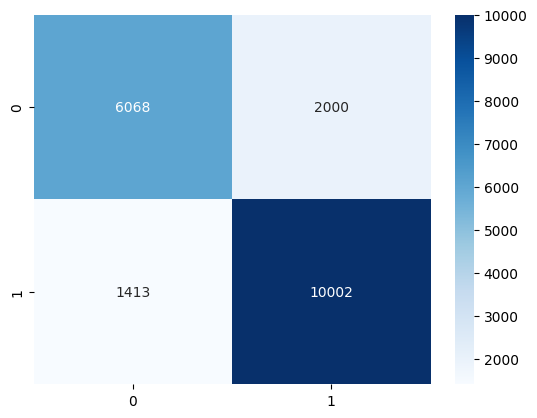

In [684]:
#### Creating a Confusion Matrix
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt="d", cmap="Blues")

In [685]:
#### Evaluate Model with Test Data
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.8225149700598803

<Axes: >

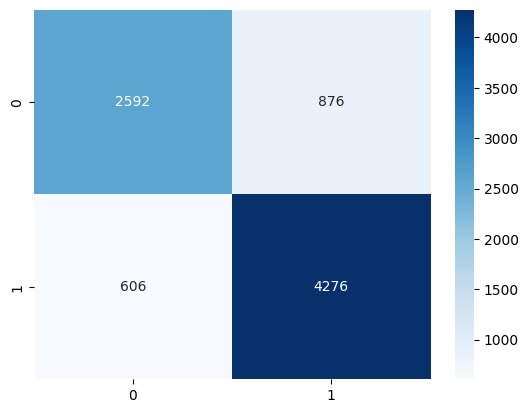

In [686]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues")

#### HyperParameter Tunning

In [687]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 9],
    "min_samples_split": [2, 3, 5, 10],
    "min_samples_leaf": [1,2,4,5],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

In [688]:
y_pred = best_tree.predict(X_train)

In [689]:
best_tree

,criterion,'entropy'
,splitter,'best'
,max_depth,8
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [690]:
accuracy_score(y_train, y_pred)

0.8517168813837704

<Axes: >

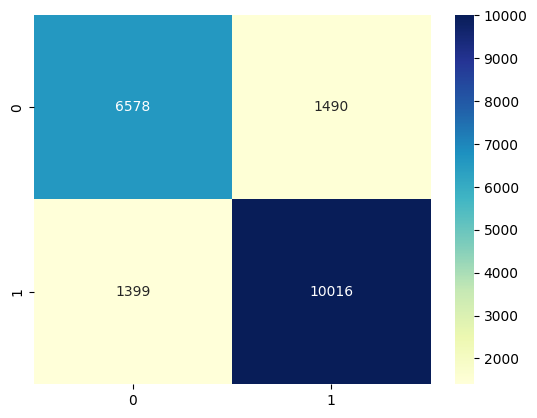

In [691]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot= True, fmt="d", cmap="YlGnBu")

In [692]:
y_pred = best_tree.predict(X_test)

In [693]:
accuracy_score(y_test, y_pred)

0.822754491017964

<Axes: >

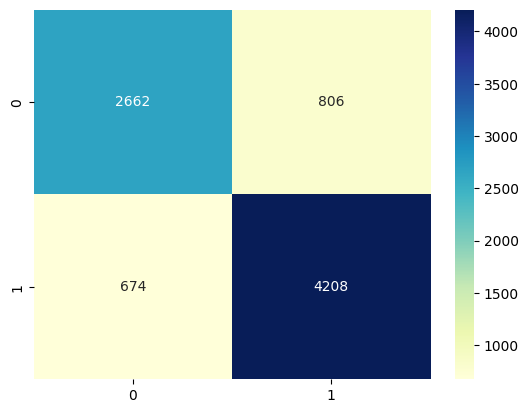

In [694]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt="d", cmap="YlGnBu")

#### Feature Importance

In [695]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_tree.feature_importances_
}).sort_values(by= "Importance", ascending= False)
#best_tree.feature_importances_
importance_df

,Feature,Importance
7,Have you ever had suicidal thoughts ?,0.453054
2,Academic Pressure,0.246972
9,Financial Stress,0.119634
1,Age,0.060280
8,Work/Study Hours,0.040935
...,...,...
49,City_Patna,0.000000
58,City_Vaanya,0.000000
57,City_Thane,0.000000
61,City_Vasai-Virar,0.000000


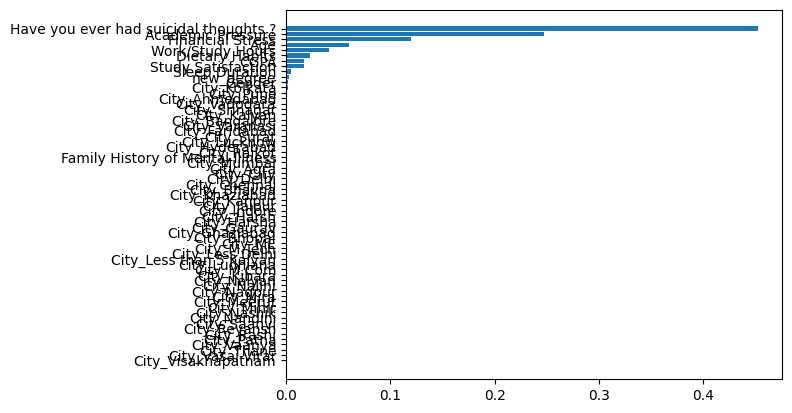

In [696]:
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.gca().invert_yaxis()

In [697]:
df_encoded.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,33.0,5.0,8.97,2.0,1,0,0,3.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,1,24.0,2.0,5.90,5.0,1,2,1,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,0,31.0,3.0,7.03,5.0,0,0,1,9.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,1,28.0,3.0,5.59,2.0,2,2,0,4.0,5.0,...,0,0,0,0,0,0,0,1,0,0
4,1,25.0,4.0,8.13,3.0,1,2,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [699]:
X = df_encoded[["Have you ever had suicidal thoughts ?", "Academic Pressure", "Financial Stress", "Work/Study Hours", "Study Satisfaction", "Dietary Habits", "Sleep Duration"]]
y = df_encoded["Depression"]

In [700]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [703]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 4, 6, 8, 9],
    "min_samples_split": [2, 5, 10, 12, 14],
    "min_samples_leaf": [1,2,3,4],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                           param_grid,
                           cv=5,
                           scoring="accuracy"
                           )

grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

In [704]:
best_tree

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [706]:
y_pred = best_tree.predict(X_train)
accuracy_score(y_train, y_pred)

0.8329312734178514

In [707]:
y_pred = best_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8274251497005988

<Axes: >

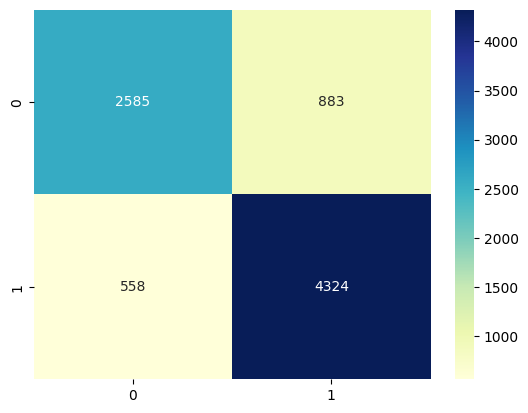

In [708]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt="d", cmap="YlGnBu")